# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
url = "https://openweathermap.org/api"
# Output File (CSV)

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
#query_url = url + " appkey  " + api_key
query_url = f"{url}appid={api_key}&q={city}"
print(query_url)

https://openweathermap.org/apiappid=aab3ee6dfef02dc1735226ee59218ce0&q=bredasdorp


In [4]:
url="http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q={cities}"
response = requests.get(query_url)
#response_json=response.json()
#print(json.dumps(response_json,indent=4,sort_keys=True))
print(f"{url}appid={api_key}&q={'hilo'}")


http://api.openweathermap.org/data/2.5/weather?appid=aab3ee6dfef02dc1735226ee59218ce0&q=hilo


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create empty list to append the API data into lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
row=0
column=0
bin={}
MAX_CITY_PER_BIN=50
#record = 1
for city in cities: 
    try:
        #response.raise_for_status()  
        response = requests.get(f"{url}appid={api_key}&q={city}").json()
        city_name.append(response["name"])
        #city_record=response["name"]
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        #print(f"Processing Record {record} | {city_record}")
        #record=record+1
        if column >= MAX_CITY_PER_BIN:
            column=0
            row += 1
        print("Processing Record " + str(column+1) + " of Set " + str(row+1) + "| " + city)
        bin[row, column]=city
        column+=1
    except: 
        print(f"City not found. Skipping")
    continue



Processing Record 1 of Set 1| vanavara
Processing Record 2 of Set 1| new norfolk
Processing Record 3 of Set 1| busselton
Processing Record 4 of Set 1| juneau
Processing Record 5 of Set 1| ribeira grande
Processing Record 6 of Set 1| dikson
Processing Record 7 of Set 1| chute-aux-outardes
Processing Record 8 of Set 1| norman wells
Processing Record 9 of Set 1| horsham
City not found. Skipping
Processing Record 10 of Set 1| castro
City not found. Skipping
Processing Record 11 of Set 1| vila franca do campo
Processing Record 12 of Set 1| lakhipur
Processing Record 13 of Set 1| hambantota
Processing Record 14 of Set 1| rikitea
Processing Record 15 of Set 1| sept-iles
Processing Record 16 of Set 1| nantucket
Processing Record 17 of Set 1| baruun-urt
Processing Record 18 of Set 1| hermanus
Processing Record 19 of Set 1| nikolskoye
Processing Record 20 of Set 1| mar del plata
Processing Record 21 of Set 1| punta arenas
Processing Record 22 of Set 1| cape town
Processing Record 23 of Set 1| se

Processing Record 44 of Set 4| ypsonas
City not found. Skipping
Processing Record 45 of Set 4| muros
Processing Record 46 of Set 4| tiksi
Processing Record 47 of Set 4| taoudenni
Processing Record 48 of Set 4| mala
Processing Record 49 of Set 4| cabo san lucas
Processing Record 50 of Set 4| nalut
Processing Record 1 of Set 5| romny
Processing Record 2 of Set 5| flin flon
Processing Record 3 of Set 5| jalu
Processing Record 4 of Set 5| nipawin
Processing Record 5 of Set 5| hrubieszow
Processing Record 6 of Set 5| eureka
Processing Record 7 of Set 5| severo-kurilsk
Processing Record 8 of Set 5| half moon bay
City not found. Skipping
City not found. Skipping
Processing Record 9 of Set 5| nemuro
Processing Record 10 of Set 5| challans
City not found. Skipping
Processing Record 11 of Set 5| leningradskiy
Processing Record 12 of Set 5| waipawa
Processing Record 13 of Set 5| carnarvon
Processing Record 14 of Set 5| denpasar
Processing Record 15 of Set 5| alofi
Processing Record 16 of Set 5| c

Processing Record 36 of Set 8| ondjiva
Processing Record 37 of Set 8| kajaani
Processing Record 38 of Set 8| brae
Processing Record 39 of Set 8| salto
Processing Record 40 of Set 8| teknaf
Processing Record 41 of Set 8| bowen
Processing Record 42 of Set 8| ustye
Processing Record 43 of Set 8| calhoun
Processing Record 44 of Set 8| rypefjord
Processing Record 45 of Set 8| kralendijk
Processing Record 46 of Set 8| coquimbo
Processing Record 47 of Set 8| lagoa
Processing Record 48 of Set 8| qasigiannguit
Processing Record 49 of Set 8| clyde river
Processing Record 50 of Set 8| sarangani
Processing Record 1 of Set 9| lorengau
City not found. Skipping
Processing Record 2 of Set 9| corsicana
Processing Record 3 of Set 9| zaysan
City not found. Skipping
Processing Record 4 of Set 9| tongliao
Processing Record 5 of Set 9| borovoy
Processing Record 6 of Set 9| fukue
Processing Record 7 of Set 9| mairana
Processing Record 8 of Set 9| portales
Processing Record 9 of Set 9| hokitika
City not found

In [6]:
# Creating the dictionary to display DataFrame

city_pd={'City':city_name,'Cloudiness': cloudiness,'Country':country ,'Date':date,'Humidity':humidity,'Lat':lat,'Lng':lng,'Max Temp':max_temp,'Wind Speed':wind_speed}
#city_count=city_pd.count
#print(type(city_pd))

In [7]:
# Creating DataFrame from dictionary
city_df = pd.DataFrame(city_pd)
#city_df['City'].count()
#city_df['Index'].count()
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vanavara,0,RU,1561523180,35,60.35,102.28,299.315,3.04
1,New Norfolk,0,AU,1561522947,50,-42.78,147.06,287.150,3.60
2,Busselton,0,AU,1561522985,64,-33.64,115.35,293.710,16.40
3,Juneau,20,US,1561522515,46,58.30,-134.42,296.150,4.60
4,Ribeira Grande,93,PT,1561522939,71,38.52,-28.70,292.015,6.24


In [8]:
# converting DataFrame to CSV file
city_df.to_csv("weatherPy.csv",encoding = "utf-8",index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

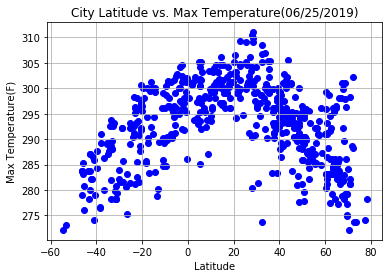

In [13]:
# plot the graph for latitude vs.Temperatue
x_axis = city_df["Lat"]
y_axis = city_df["Max Temp"]
plt.title("City Latitude vs. Max Temperature(06/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.scatter(x_axis,y_axis,marker = "o",color = "blue")
plt.grid()
plt.savefig("../Images/LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

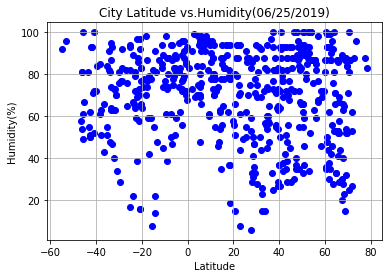

In [14]:
#plot the graph Latitude vs. Humidity plot
x_axis = city_df["Lat"]
y_axis = city_df["Humidity"]
plt.title("City Latitude vs.Humidity(06/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.scatter(x_axis,y_axis,marker = "o",color = "blue")
plt.grid()
plt.savefig("../Images/LatVsHumid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

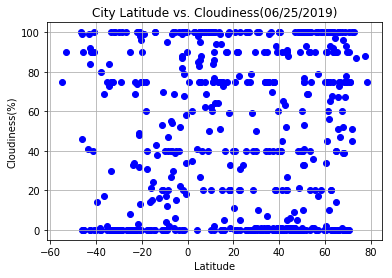

In [15]:
#plot the graph between  Latitude vs Cloudiness
x_axis = city_df["Lat"]
y_axis = city_df["Cloudiness"]
plt.title("City Latitude vs. Cloudiness(06/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.scatter(x_axis,y_axis,marker = "o",color = "blue")
plt.grid()
plt.savefig("../Images/LatVscloudy.png")
plt.show()

#### Latitude vs. Wind Speed Plot

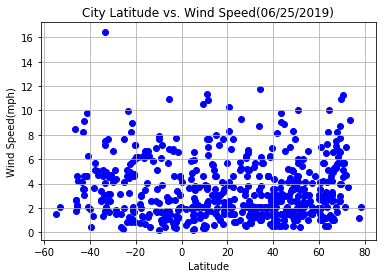

In [16]:
#plot the graph between Latitude vs.Wind Speed plot
x_axis = city_df["Lat"]
y_axis = city_df["Wind Speed"]
plt.title("City Latitude vs. Wind Speed(06/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.scatter(x_axis,y_axis,marker = "o",color = "blue")
plt.grid()
plt.savefig("../Images/LatVsWindSpeed.png")
plt.show()

Data Analysis:
    1. As we go from south of the equator(below the equator) to the line of equator Maximun temperature increase up to latitude (30) .
    2. AS we go from line of eqautor to north of equator(above the equator) Maximum temperature decreases.
    